# Análisis Factorial Exploratorio (AFE) y Confirmatorio (AFC) de variables categóricas en R:

## Librerías:
Al usar R en Google Colab debemos:
1.   Instalar los paquetes/librerías (**install.packages("paquete")**) una vez cada vez que abramos el cuaderno de nuevo. Algunos paquetes ya  instalados por defecto en Colab, por lo que debemos pasar directamente al siguiente paso.
2.   Llamar a los paquetes/librerías (**library(paquete)**) una vez cada vez que abramos el cuaderno de nuevo - y tras haberlos instalado.

In [ ]:
install.packages("caret") #Para llevar a cabo la división de la muestra en dos mitades mediante muestreo de las observaciones
library(caret)
install.packages("psych") #Para realizar el AFE, el Análisis Paralelo y otras operaciones como el test de Mardia o el KMO
library(psych)
install.packages("polycor") #Para estimar la matriz policórica o tetracórica según el caso
library(polycor)
install.packages("ggcorrplot") #Para graficar las correlaciones obtenidas mediante un mapa de calor
library(ggcorrplot)
install.packages("GPArotation") #Para poder rotar los factores
library(GPArotation)
install.packages("lavaan") #Para realizar el AFC
library(lavaan)

## Datos:
Los datos que vamos a utilizar para ejemplificar cómo hacer un Análisis Factorial en R proceden de la evaluación PISA 2018 para España. Todos los datos de PISA 2018 se pueden descargar en el siguiente link en formato SPSS o SAS:
https://www.oecd.org/pisa/data/2018database/ 

Sin embargo, para facilitar la utilización de este script, se ha subido un archivo - en formato *.csv* - al GitHub del proyecto. Dicho archivo se encuentra en la pestaña *Datasets*, y contiene exclusivamente los datos con los que vamos a trabajar. Específicamente, estos datos proceden del *Cuestionario de contexto del alumno*, cuestionario que deben rellenar todos los alumnos que pasan PISA y que trata de medir la existencia de variables socioeconómicas, metacognitivas, motivacionales e, incluso, emocionales, que pueden tener impacto sobre el rendimiento académico. Entre las variables relacionadas con la motivación podemos encontrar:
* La afición por la lectura.
* La actitud hacia la Educación.
* La competitividad.
* La perseverancia.
* El miedo al fracaso.
* La autoeficacia.
* La orientación a metas de aproximación a la maestría.

Pero, para simplificar más las cosas y no trabajar con un número considerable de factores, nos vamos a centrar simplemente en tres: la competitividad, la perseverancia y el miedo al fracaso.

Los items (preguntas) que miden respectivamente la competitividad, al perseverancia y el miedo al fracaso de los estudiantes son:

**¿Hasta qué punto estás de acuerdo con las siguientes afirmaciones sobre ti mismo?**
* ST181Q02HA: Disfruto trabajando en situaciones que requieren competir con los demás.
* ST181Q03HA: Es importante para mí hacerlo mejor que los demás al realizar una tarea.
* ST181Q04HA: Me esfuerzo mucho cuando estoy compitiendo contra los demás.

**¿Hasta qué punto estás de acuerdo con las siguientes afirmaciones sobre ti mismo?**
* ST182Q03HA: Me siento satisfecho cuando me esfuerzo todo lo que puedo.
* ST182Q04HA: Cuando inicio una tarea continúo hasta terminarla.
* ST182Q05HA: Cuando hago algo, parte de mi satisfacción se debe a que he mejorado mis resultados anteriores.
* ST182Q06HA: Si algo no se me da bien, prefiero seguir esforzándome para mejorar, en lugar de hacer otra cosa que sí se me da bien.

**¿Hasta qué punto estás de acuerdo con las siguientes afirmaciones?**
* ST183Q01HA: Cuando me he equivocado, me preocupa lo que otras personas piesen de mí.
* ST183Q02HA: Cuando me he equivocado, me preocupa no tener el talento suficiente.
* ST183Q03HA: Cuando me he equivocado, dudo sobre mis planes para el futuro.

La escala de respuesta para estos tres conjuntos de ítems es la misma: 1 - *Totalmente en desacuerdo*, 2 - *En desacuerdo*, 3 - *De acuerdo* y 4 - *Totalmente de acuerdo*.




Para subir un archivo de datos (por ejemplo, un .csv) a Google Colab y trabajar con R debemos hacer lo siguiente:


1.   Clicamos en el icono de la derecha de la pantalla que tiene forma de carpeta y se abre un desplegable a su derecha.
2.   Clicamos en el icono que nos muestra una carpeta con una flecha hacia arriba en su interior.
3. Se abrirá una carpeta para que busquemos el archivo. Una vez seleccionado, le damos a "Abrir".
4. Esperamos a que se cargue y, una vez cargado, ya podemos usar la función de R apropiada para leer dicho archivo.

(Esta operación hay de carga hay que realizarla cada vez que se abra el cuaderno)

In [3]:
datos <- read.csv("Datos_PISA_ESP.csv", sep=";", dec=",")
#Este csv esta separado por ; y los decimales son ,
dim(datos) #Tenemos 35943 observaciones y 37 columnas
head(datos)

[1] 35943    37

,CNTRYID,CNT,CNTSCHID,CNTSTUID,ST160Q01IA,ST160Q02IA,ST160Q03IA,ST160Q04IA,ST160Q05IA,JOYREAD,⋯,ST188Q01HA,ST188Q02HA,ST188Q03HA,ST188Q06HA,ST188Q07HA,RESILIENCE,ST208Q01HA,ST208Q02HA,ST208Q04HA,MASTGOAL
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,724,ESP,72400001,72400490,2,2,2,2,3,-0.1042,⋯,3,3,2,2,3,-0.8109,3,3,3,-0.4347
2,724,ESP,72400001,72401482,3,1,2,3,3,-0.8176,⋯,2,3,3,3,3,-0.4531,4,3,5,0.4317
3,724,ESP,72400001,72402362,3,1,1,2,3,-0.9016,⋯,3,3,3,2,2,-0.8738,5,5,5,1.8524
4,724,ESP,72400001,72402959,1,1,1,1,1,-0.1119,⋯,3,2,3,3,3,-0.4909,4,4,4,0.5761
5,724,ESP,72400001,72403316,1,3,2,1,1,0.9011,⋯,3,3,3,3,3,-0.0614,2,2,3,-1.0266
6,724,ESP,72400001,72403522,3,1,2,3,3,-0.8176,⋯,4,3,3,4,3,0.7512,4,4,4,0.5761


Como vamos a hacer un doble Análisis Factorial - exploratorio y confirmatorio - vamos a dividir la muestra en aproximadamente el 50%, realizando el Exploratorio sobre una mitad, y el Confirmatorio sobre la otra, para ver si los resultados concuerdan.

In [4]:
#Vamos a extraer simplemente las columnas de identificador del alumno y las de los items que nos interesan (los que miden la competitividad, la perseverancia y el miedo al fracaso):
subconjunto <- datos[,c("CNTSTUID", "ST181Q02HA", "ST181Q03HA", "ST181Q04HA", "ST182Q03HA", "ST182Q04HA", "ST182Q05HA", "ST182Q06HA", "ST183Q01HA", "ST183Q02HA", "ST183Q03HA")]
set.seed(2021) #Establecemos una semilla para facilitar la reproductibilidad de los resultados
subconjunto.ids <- createDataPartition(subconjunto$CNTSTUID, p=0.5, list=F)
#Obtenemos mediante muestreo aleatorio el 50% de las observaciones (identificadas mediante la columna de ID del alumno)
datos_AFE <- subconjunto[subconjunto.ids, ] #Para el Exploratorio solo conservamos las observaciones cuyos IDs han sido muestreados
dim(datos_AFE) #17972 observaciones
datos_AFC <- subconjunto[-subconjunto.ids, ] #Para el Confirmatorio solo conservamos las observaciones cuyos IDs no han sido muestreados
dim(datos_AFC) #17971 observaciones
#Eliminamos la columna de IDs, ya que no nos hace falta:
datos_AFE$CNTSTUID <- NULL
datos_AFC$CNTSTUID <- NULL

[1] 17972    11

[1] 17971    11

## Análisis Factorial Exploratorio (AFE):
El Análisis Factorial Exploratorio (AFE) es un método para reducir la dimensionalidad de un conjunto de variables/indicadores, es decir, es un método para resumir la información. En este sentido, puede confundirse con el Análisis de Componentes Principales (ACP).

El ACP parte de la varianza total para encontrar combinaciones lineales entre las variables originales que expliquen la mayor parte de dicha varianza total. Así, el primer componente principal sería aquella combinación lineal de variables que explica un mayor porcentaje de varianza total; el segundo componente principal sería aquel que explica la mayor proporción de varianza no explicada por el primero, y así sucesivamente.Al aplicar ACP a un conjunto de datos conseguimos pues resumir la información en unas pocas componentes principales. Dichas componentes principales, al ser combinaciones lineales de variables, resultan, muchas veces, difíciles de interpretar.

Por su parte, el AFE distingue entre varianza común y varianza específica. La varianza común o compartida es aquella parte de la variabilidad total de los datos que está compartida entre las variables; mientras, la varianza no compartida es la específica de cada variable. Los factores comunes son, por tanto, variables subyacentes - no observadas - que explican la asociación entre las variables.

Asimismo, desde el punto de vista de las variables, decimos que la comunalidad de una variable es la parte de su varianza explicada por los factores comunes. Por ello, interesa que este dato sea alto. Por el contrario, la especificidad es la parte de variabilidad de una variable específica de dicha variable. Esta última conviene pues que sea baja.

Los factores sí suelen tener una interpretación más sencilla que los componentes principales. Asimismo, mientras los componentes principales, por definición, no están correlacionados, los factores pueden estarlo.

El AFE suele utilizarse con datos procendentes de encuestas sociales, psicológicas o sanitarias, sin embargo, también puede aplicarse a otros tipos de datos. En nuestro caso tenemos datos procedentes de una encuesta de carácter educativo.


###Paso 1: Estimación de la matriz de correlaciones.
Dependiendo del tipo de datos que tengamos, debemos utilizar un tipo de correlación u otro:
* Datos continuos: La matriz de correlaciones de Pearson y la de Spearman son las más apropiadas ante continuos o ante datos ordinales (categóricos) con más de 7 categorías de respuesta (tienden a la continuidad).
* Datos categóricos/ordinales: la matriz de correlaciones policórica es la más recomendada ante datos ordinales de 7 o menos categorías de respuesta. Si tuviéramos datos dicotómicos, la matriz a emplear sería la matriz tetracórica (similar a la policórica pero con datos dicotómicos).

En nuestro caso, como tenemos datos ordinales con 5 opciones de respuesta, usaremos la matriz de correlaciones policórica.

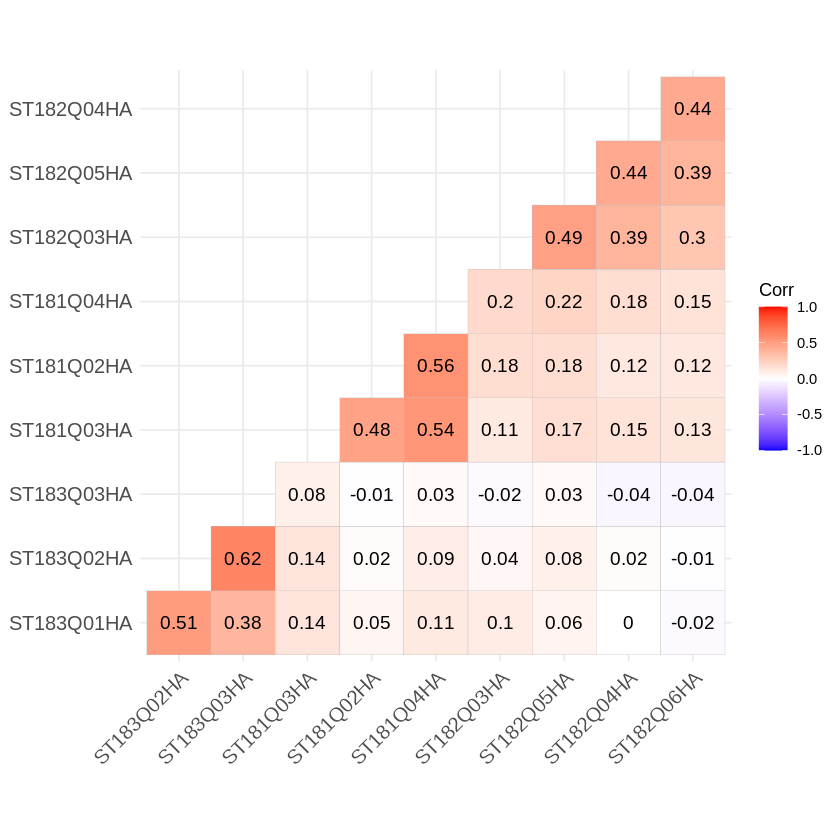

In [8]:
policorica <- hetcor(datos_AFE)$correlations
ggcorrplot(policorica,type="lower",hc.order = T, lab=T)

Vemos que las correlaciones son más altas entre los ítems que conforman cada uno de los subgrupos teóricos.

### Paso 2: Verificar que la matriz sea factorizable (es decir, que tiene sentido hacer un AFE con nuestros datos):
(Si la matriz no fuese factorizable, la relación entre las variables sería tan baja que no se formarían factores).

Entre los métodos para comprobar si la matriz es factorizable destacan:
* Test de esfericidad de Bartlett: se pregunta si la matriz de correlaciones es o no la matriz identidad. Si la matriz de correlaciones es la matriz identidad, las variables no estarían correlacionadas y no habría varianza compartida de la que extraer los factores (no habría factores comunes). Si rechazamos la hipótesis nula (la matriz de correlaciones es la matriz identidad), la matriz será factorizable.
* Medida KMO (Kaiser-Meyer-Olkin): expresa el grado de predicción de las variables a partir de las demás. Su valor oscila entre 0 y 1. Cuanto mayor sea, mejor. Valores a partir de 0,5 se consideran aceptables.
* Calcular el determinante de la matriz de correlaciones: valores cercanos a cero indican que la matriz es factorizable.

In [13]:
#Test de esfericidad de Bartlett:
p_esf <- cortest.bartlett(policorica, n=nrow(datos_AFE))
cat("El p-valor del test de esfiricidad de Bartlett es: ", p_esf$p.value)
#KMO:
KMO(policorica)
#Determinante de la matriz:
cat("El valor del determinante de la matriz es: ", det(policorica))

El p-valor del test de esfiricidad de Bartlett es:  0

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = policorica)
Overall MSA =  0.73
MSA for each item = 
ST181Q02HA ST181Q03HA ST181Q04HA ST182Q03HA ST182Q04HA ST182Q05HA ST182Q06HA 
      0.74       0.76       0.72       0.76       0.77       0.77       0.79 
ST183Q01HA ST183Q02HA ST183Q03HA 
      0.74       0.62       0.65 

El valor del determinante de la matriz es:  0.07879726

1. El p-valor es menor a los niveles de significación habituales(10%, 5% y 1%) por lo que rechazamos la hipótesis nula: la matriz de correlaciones no es la matriz identidad.
2. El resultado del KMO es bueno: 0,73.
3. El determinante tiene un valor bastante bajo.

Los test muestran que la matriz es factorizable.

### Paso 3: determinar un método de extracción de factores:
La ecuación del modelo factorial es la siguiente:

\begin{align}
X_j = a_{j1}F_1 + a_{j2}F_2
+ ... +a_{jn}F_n + u_j
\end{align}

Donde $X_j$ (variable j) es una combinación lineal de factores comunes y del factor único (especificidad). Los $a_{jh}$ son los pesos factoriales, que representan la importancia que cada factor común tiene en explicar la variable $X_j$.

El objetivo de los métodos de extracción de factores es reproducir, con el mínimo error, la matriz de correlaciones a partir de la matriz de pesos factoriales.

Existen varios métodos de extracción de factores. Los más comunes son:
*   Máxima Verosimilitud (*Maximum Likelihood*, ML). Para utilizarlo, nuestros datos deben seguir una normal multivariante (lo que podemos comprobar realizando el test de Mardia, por ejemplo). Estadísticamente es el más adecuado, pues es asintóticamente insesgado, eficiente y consistente.
*   Mínimos Cuadrados No Ponderados (*Unweighted Least Squares*, ULS) (También llamado Residuos Mínimos, MinRes). No requiere de la existencia de normalidad multivariante.
* Ejes principales. Tampoco requiere de datos que sigan una normal multivariante.
* Componentes principales. Como hemos dicho en la introducción, no es método de ánalisis factorial propiamente dicho, ya que su objetivo es intentar explicar toda la varianza, y no solo la varianza común o compartida. Sin embargo, su uso, aunque no se recomiende, está bastante extendido, pues es la opción por defecto de muchos programas estadísticos.

Call: mardia(x = datos_AFE, na.rm = TRUE)

Mardia tests of multivariate skew and kurtosis
Use describe(x) the to get univariate tests
n.obs = 16232   num.vars =  10 
b1p =  3.92   skew =  10595.01  with probability  <=  0
 small sample skew =  10597.33  with probability <=  0
b2p =  140.16   kurtosis =  82.89  with probability <=  0

Warning message in ks.test(datos_AFE, pnorm):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  datos_AFE
D = 0.88912, p-value < 2.2e-16
alternative hypothesis: two-sided


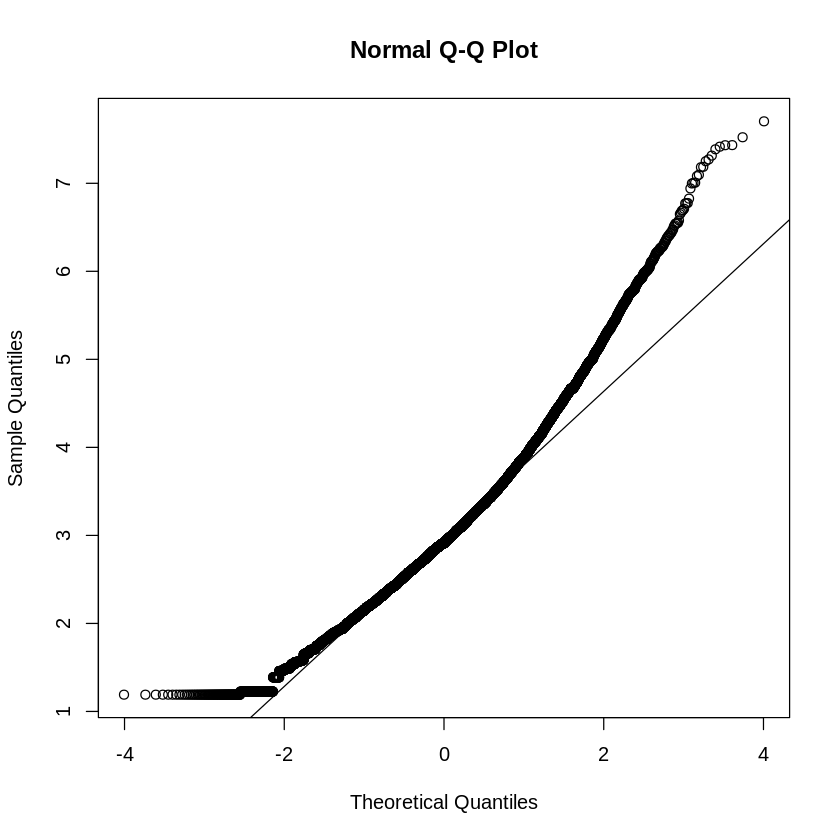

In [ ]:
#Test de Mardia de normalidad multivariante:
mardia(datos_AFE, na.rm = TRUE)

Como los p-valores son inferiores a los niveles de significación habituales (10%, 5% y 1%) se rechaza la hipótesis nula, es decir, se rechaza la normalidad de los datos.

También podemos comprobar este hecho haciendo uso del Q-Q plot, ya que la línea de puntos está bastante alejada de la recta que refleja la normal.

Como no existe normalidad, debemos emplear un método de extracción de factores robusto la inexistencia de la misma, como es ULS (Mínimos Cuadrados No Ponderados).

### Paso 4: Determinamos el número de factores a extraer:
Existen cuatro métodos principales:
* Regla de Kaiser: se deben aceptar todos aquellos factores con un autovalor mayor a 1.
* Gráfico de sedimentación (*scree plot*): gráfico donde podemos ver cómo disminuye la varianza explicada o el autovalor a medida que vamos aumentando el número de factores a extraer. Se complementa muy bien con la regla de Kaiser.
* Establecimiento de un porcentaje de varianza explicada mínimo (por ejemplo, el 75%): cogeríamos todos los factores necesarios para explicar ese porcentaje mínimo de varianza.
* Análisis paralelo (AP, método recomendado): el AP parte de generar nuevas muestras aleatorias (mínimo 100) con el mismo número de variables y observaciones que la muestra original y, a partir de ello, se queda con aquellos factores cuyo autovalor es superior a los generados por azar. 

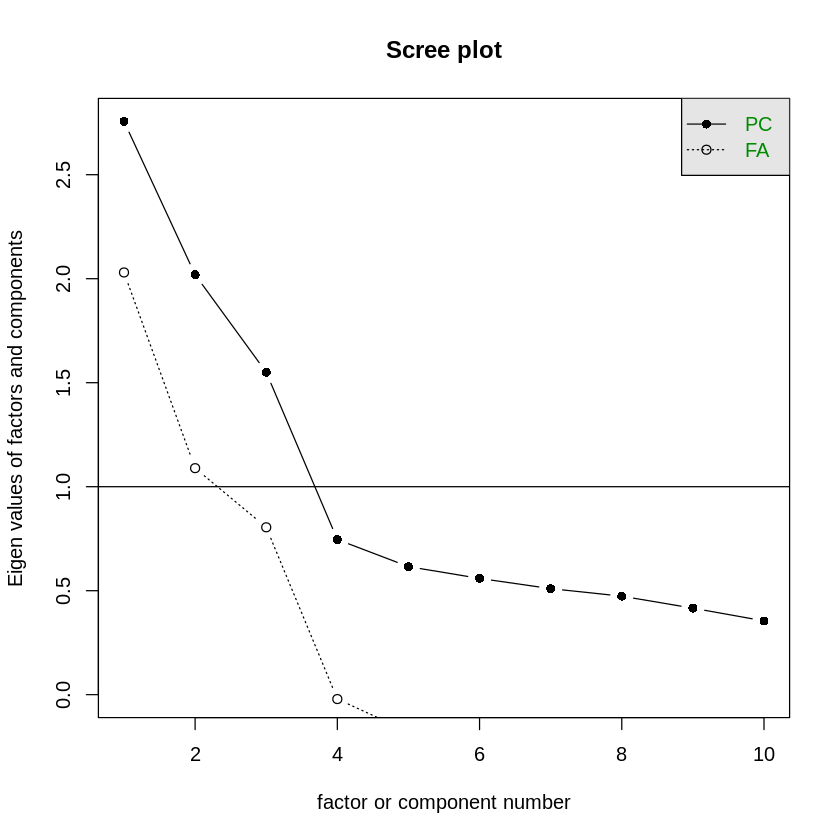

Parallel analysis suggests that the number of factors =  3  and the number of components =  NA 


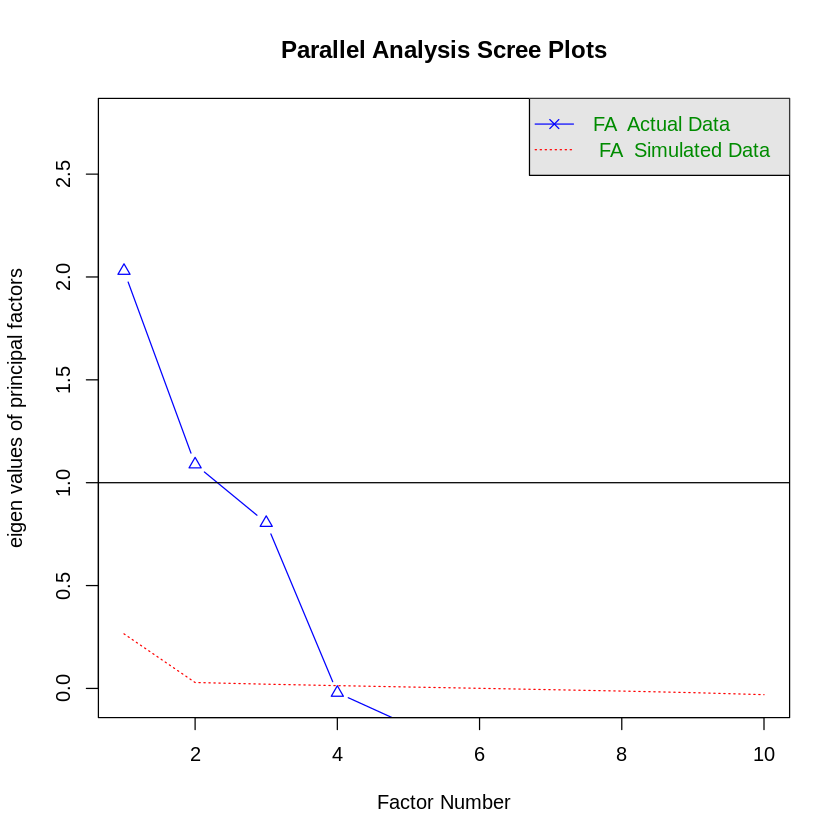

In [ ]:
#Gráfico de sedimentación con la regla de Kaiser marcada:
scree(policorica)
#Análisis paralelo:
fa.parallel(policorica, n.obs=nrow(datos_AFE), n.iter=500, fa="fa", fm="uls")

El Análisis Paralelo sugiere la extracción de tres factores, la regla de Kaiser, de 2, y el gráfico de sedimentación podríamos decir que de 3.

Haremos caso al Análisis Paralelo, por ser la técnica más recomendada actualmente.

### Paso 5: Extracción de factores + rotación:
Vamos a extraer tres factores, siguiendo lo recomendado por el Análisis Paralelo.

Asimismo, debemos decidir si vamos a rotar los factores y qué tipo de rotación vamos a emplear. Los métodos de rotación facilitan la interpretación de los factores, ya que sin rotarlos, suele ser muy difíciles de interpretar, por lo que se recomienda el uso de dichas técnicas de rotación.

Existen dos tipos de rotación:
* Rotación oblicua: permite que los factores puedan tener correlación entre ellos. Tipo recomendado, ya que es el más cercano a la estructura real que deseamos explorar. Un ejemplo es el método *oblimin*.
* Rotación ortogonal: fuerza a los factores a que no puedan tener correlación entre ellos. Un ejemplo es el método *varimax*.

Probaremos los dos y nos quedaremos con la solución que mejor resultado arroje. Pero, ¿cómo determinamos qué solución factorial ajusta mejor?
* Fijándonos en los pesos factoriales: Cuanto mayor sea el peso factorial de un ítem en un factor mejor. Se aceptan pesos factoriales por encima de 0,4. En general, una buena solución presentará variables que pesan mucho en un factor y poco en el resto.
* Índices de bondad del ajuste. Existen unos cuantos, pero nos podemos fijar en RMSEA, SRMR, TLI y CFI. RMSEA y SRMR cuantos más bajos mejor (se aceptan valores por debajo de 0,08), y TLI y CFI cuantos más altos mejor (valores por encima de 0,95 se consideran muy buenos).

Factor Analysis using method =  uls
Call: fa(r = policorica, nfactors = 3, n.obs = nrow(datos_AFE), rotate = "oblimin", 
    fm = "uls", alpha = 0.05)
Standardized loadings (pattern matrix) based upon correlation matrix
            ULS1  ULS2  ULS3   h2   u2 com
ST181Q02HA -0.01 -0.06  0.72 0.50 0.50   1
ST181Q03HA -0.02  0.07  0.68 0.47 0.53   1
ST181Q04HA  0.02  0.00  0.79 0.64 0.36   1
ST182Q03HA  0.60  0.02  0.02 0.37 0.63   1
ST182Q04HA  0.67 -0.03 -0.02 0.44 0.56   1
ST182Q05HA  0.71  0.05  0.01 0.52 0.48   1
ST182Q06HA  0.58 -0.06 -0.01 0.33 0.67   1
ST183Q01HA  0.01  0.57  0.06 0.33 0.67   1
ST183Q02HA  0.02  0.90  0.00 0.81 0.19   1
ST183Q03HA -0.04  0.69 -0.03 0.47 0.53   1

                      ULS1 ULS2 ULS3
SS loadings           1.65 1.62 1.61
Proportion Var        0.17 0.16 0.16
Cumulative Var        0.17 0.33 0.49
Proportion Explained  0.34 0.33 0.33
Cumulative Proportion 0.34 0.67 1.00

 With factor correlations of 
     ULS1 ULS2 ULS3
ULS1 1.00 0.05 0.34
ULS2 0.05 1.0

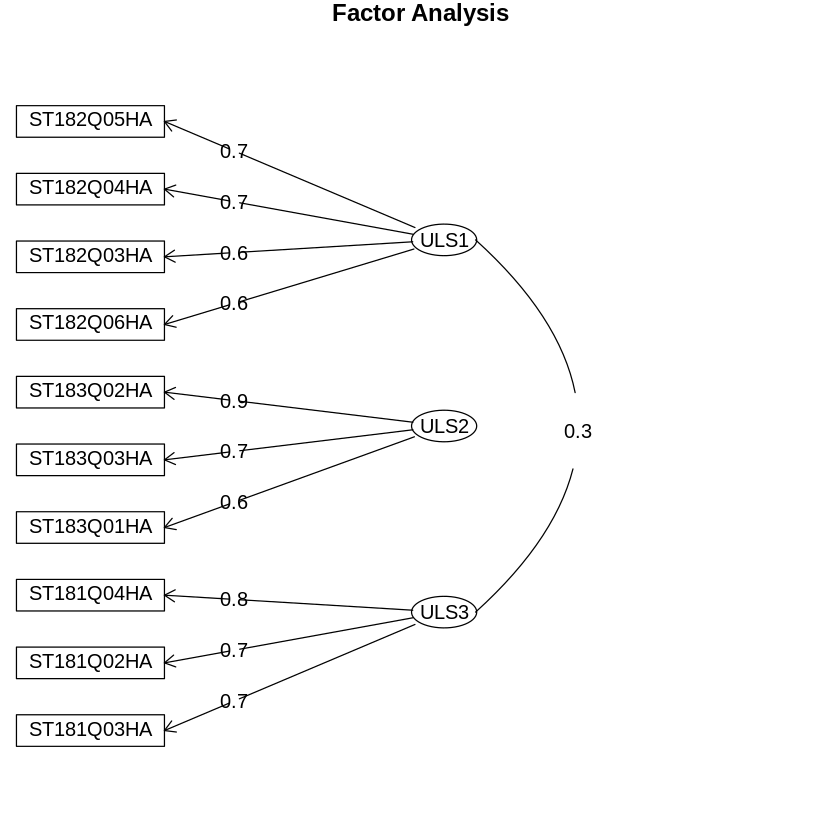

In [ ]:
#Con rotación oblicua oblimin:
AFE_oblimin <- fa(policorica, nfactors=3, n.obs=nrow(datos_AFE), rotate="oblimin", fm="uls", alpha=0.05)
AFE_oblimin
fa.diagram(AFE_oblimin)


* Vemos que los items que más pesan en el factor 1 son los correspondientes a la variable Perseverancia - los que comienzan por ST182.
* Los items que más pesan en el factor 2 son los correspondientes a la variable Miedo al fracaso - los que comienzan por ST183.
* Los ítems que más pesan en el factor 3 son los correspondientes a la variable Competitividad - los que comienzan por ST181.
* Los índices de bondad del ajuste son muy buenos: RMSEA y RMSR inferiores a 0,08 y TLI mayor a 0,95
* En el gráfico vemos que los factores 1 y 3 (perseverancia y competitividad) están ligeramente correlacionados.

Factor Analysis using method =  uls
Call: fa(r = policorica, nfactors = 3, n.obs = nrow(datos_AFE), rotate = "varimax", 
    fm = "uls", alpha = 0.05)
Standardized loadings (pattern matrix) based upon correlation matrix
            ULS1  ULS2 ULS3   h2   u2 com
ST181Q02HA  0.12 -0.01 0.70 0.50 0.50 1.1
ST181Q03HA  0.11  0.12 0.66 0.47 0.53 1.1
ST181Q04HA  0.17  0.05 0.78 0.64 0.36 1.1
ST182Q03HA  0.60  0.04 0.12 0.37 0.63 1.1
ST182Q04HA  0.66 -0.02 0.09 0.44 0.56 1.0
ST182Q05HA  0.70  0.06 0.13 0.52 0.48 1.1
ST182Q06HA  0.57 -0.04 0.08 0.33 0.67 1.1
ST183Q01HA  0.03  0.57 0.09 0.33 0.67 1.1
ST183Q02HA  0.03  0.90 0.04 0.81 0.19 1.0
ST183Q03HA -0.04  0.68 0.00 0.47 0.53 1.0

                      ULS1 ULS2 ULS3
SS loadings           1.66 1.62 1.59
Proportion Var        0.17 0.16 0.16
Cumulative Var        0.17 0.33 0.49
Proportion Explained  0.34 0.33 0.33
Cumulative Proportion 0.34 0.67 1.00

Mean item complexity =  1.1
Test of the hypothesis that 3 factors are sufficient.

The degrees

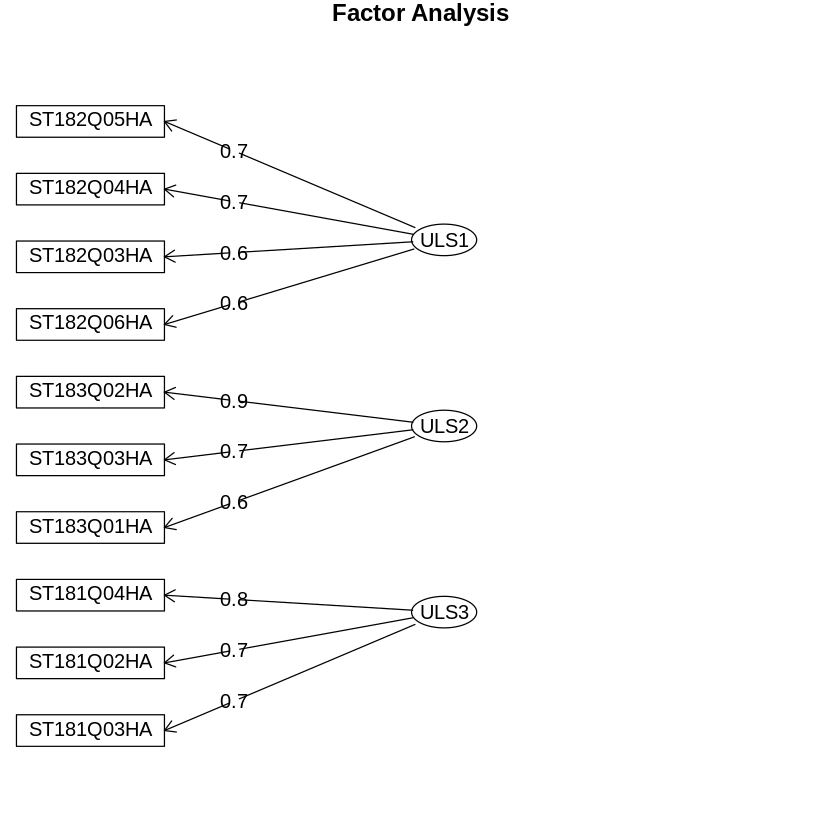

In [ ]:
AFE_varimax <- fa(policorica, nfactors=3, n.obs=nrow(datos_AFE), rotate="varimax", fm="uls", alpha=0.05)
AFE_varimax
fa.diagram(AFE_varimax)

Los resultados son muy similares a los obtenidos con la rotación oblicua:
* Vemos que los items que más pesan en el factor 1 son los correspondientes a la variable Perseverancia - los que comienzan por ST182.
* Los items que más pesan en el factor 2 son los correspondientes a la variable Miedo al fracaso - los que comienzan por ST183.
* Los ítems que más pesan en el factor 3 son los correspondientes a la variable Competitividad - los que comienzan por ST181.
* Los índices de bondad del ajuste son muy buenos: RMSEA y RMSR inferiores a 0,08 y TLI mayor a 0,95
* En el gráfico vemos que los factores 1 y 3 ya no están correlacionados.

### Resultados AFE:
La estructura factorial obtenida concuerda con la estructura factorial teórica de tres factores

## Análisis Factorial Confirmatorio (AFC):
La diferencia fundamental entre el AFE y el AFC, es que el AFE, como su propio nombre indica, es una técnica exploratoria: con ella queremos conocer la estructura de factores o variables latentes subyacente a los datos. Sin embargo, con el AFC, nosotros testamos si una determinada estructura factorial ajusta bien o no a los datos. Esto es, en este segundo caso, nosotros debemos imponer una estructura fatorial de antemano. Recurriendo a los índices de bondad del ajusto comprobaremos si dicha estructura es o no correcta.

### Paso 1: determinar un método de extracción de factores:
Al igual que hacíamos con el AFE, con el AFC también debemos determinar un método concreto para extraer los factores. Con el fin de establecer un método u otro, llevaremos a cabo un test de Mardia: si existiera normalidad multivariante, podríamos utilizar Máxima Verosimilitud. Si nuestros datos no fuesen normales, Mínimo Cuadrados No Ponderados sería una buena opción. 

Call: mardia(x = datos_AFC, na.rm = TRUE)

Mardia tests of multivariate skew and kurtosis
Use describe(x) the to get univariate tests
n.obs = 16255   num.vars =  10 
b1p =  3.68   skew =  9980.25  with probability  <=  0
 small sample skew =  9982.43  with probability <=  0
b2p =  140.86   kurtosis =  85.84  with probability <=  0

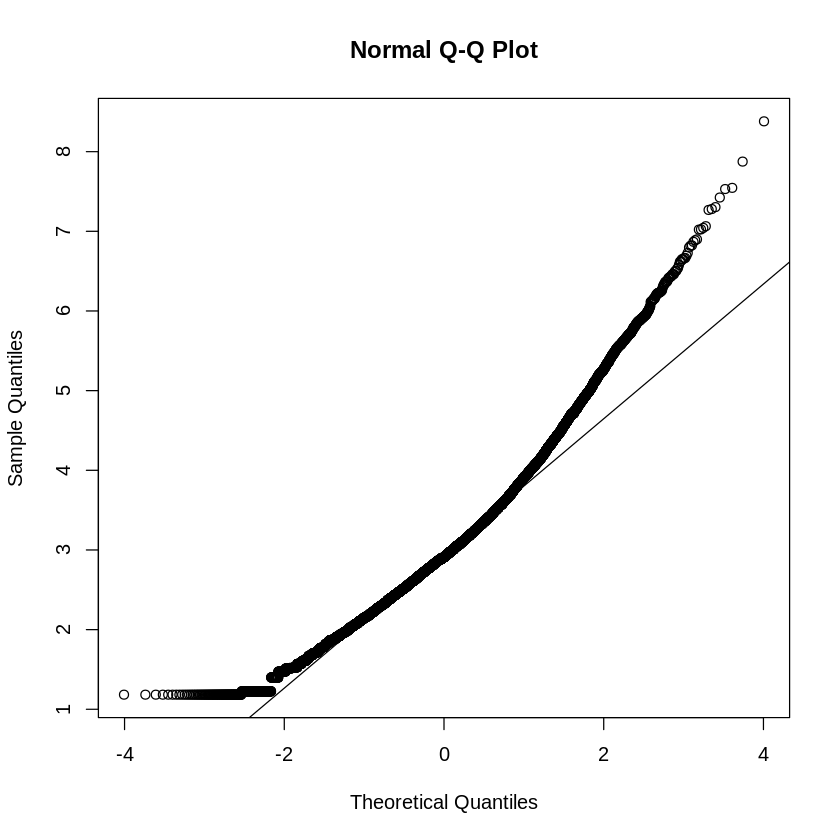

In [5]:
mardia(datos_AFC, na.rm = TRUE)

Como podíamos esperar los resultados son idénticos a los obtenidos con la mitad de la muestra destinada al AFE: rechazamos la hipótesis nula de normalidad multivariante (al ser los p-valores inferiores a los niveles de significación habituales). Por ello, tampoco podemos usar Máxima Verosimilitud para el AFC, y usaremos, de nuevo, Mínimos Cuadrados No Ponderados (ULS).

### Paso 2: Probar una o varias estructuras factoriales:
Vamos a probar modelos con uno, dos y tres factores.

Para comparar modelos nos vamos a fijar en los índices de bondad del ajuste. Al igual que comentamos con el AFE: la situación óptima es aquella en la que los índices SRMR y RMSEA son inferiores a 0,8 - cuanto más bajos mejor -, y los índices TLI y CFI son superiores a 0,95 - cuanto más altos mejor.

### Modelo con tres factores teóricos:

In [ ]:
#Especificamos el modelo: en este modelo se respetan los tres factores teóricos:
modelo3F <- 'Competitividad =~ ST181Q02HA + ST181Q03HA + ST181Q04HA
             Perseverancia =~ ST182Q03HA + ST182Q04HA + ST182Q05HA + ST182Q06HA
             Miedo_al_fracaso =~ ST183Q01HA + ST183Q02HA + ST183Q03HA'
#Realizamos el factorial:
factorial3F <- cfa(modelo3F, datos_AFC, estimator="ULS", ordered=TRUE, orthogonal=FALSE)
#Al usar la opción ordered=TRUE usamos la matriz policórica
#Al usar la opción orthogonal=FALSE estamos diciendo que puede haber correlación entre factores
summary(factorial3F, fit.measures=TRUE, standardized=TRUE)
#Nos despliega una gran cantidad de información, pero lo esencial es fijarse en los índices de bondad del ajuste:

lavaan 0.6-9 ended normally after 30 iterations

  Estimator                                        ULS
  Optimization method                           NLMINB
  Number of model parameters                        43
                                                      
                                                  Used       Total
  Number of observations                         16255       17971
                                                                  
Model Test User Model:
                                                      
  Test statistic                              1347.860
  Degrees of freedom                                32
  P-value (Unknown)                                 NA

Model Test Baseline Model:

  Test statistic                             69227.035
  Degrees of freedom                                45
  P-value                                           NA

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.981
  

El ajuste es muy bueno: RMSEA y SRMR < 0,08, y TLI y CFI > 0,95

### Modelo con dos factores:

In [ ]:
#Especificamos el modelo: en este modelo Competitividad y Perseverancia los introducimos en el mismo factor, ya que con el AFE vimos que tenían correlación:
modelo2F <- 'Competitividad_Perseverancia =~ ST181Q02HA + ST181Q03HA + ST181Q04HA + ST182Q03HA + ST182Q04HA + ST182Q05HA + ST182Q06HA
             Miedo_al_fracaso =~ ST183Q01HA + ST183Q02HA + ST183Q03HA'
#Realizamos el factorial:
factorial2F <- cfa(modelo2F, datos_AFC, estimator="ULS", ordered=TRUE, orthogonal=FALSE)
summary(factorial2F, fit.measures=TRUE, standardized=TRUE)

lavaan 0.6-9 ended normally after 29 iterations

  Estimator                                        ULS
  Optimization method                           NLMINB
  Number of model parameters                        41
                                                      
                                                  Used       Total
  Number of observations                         16255       17971
                                                                  
Model Test User Model:
                                                       
  Test statistic                              11937.402
  Degrees of freedom                                 34
  P-value (Unknown)                                  NA

Model Test Baseline Model:

  Test statistic                             69227.035
  Degrees of freedom                                45
  P-value                                           NA

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.82

El ajuste no es bueno: RMSEA y SRMR > 0,08, y TLI y CFI < 0,95

### Modelo con un factor:

In [ ]:
#Especificamos el modelo: todos los items en un único factor:
modelo1F <- 'Factor =~ ST181Q02HA + ST181Q03HA + ST181Q04HA + ST182Q03HA + ST182Q04HA + ST182Q05HA + ST182Q06HA + ST183Q01HA + ST183Q02HA + ST183Q03HA'
#Realizamos el factorial:
factorial1F <- cfa(modelo1F, datos_AFC, estimator="ULS", ordered=TRUE, orthogonal=FALSE)
summary(factorial1F, fit.measures=TRUE, standardized=TRUE)

lavaan 0.6-9 ended normally after 24 iterations

  Estimator                                        ULS
  Optimization method                           NLMINB
  Number of model parameters                        40
                                                      
                                                  Used       Total
  Number of observations                         16255       17971
                                                                  
Model Test User Model:
                                                       
  Test statistic                              28114.458
  Degrees of freedom                                 35
  P-value (Unknown)                                  NA

Model Test Baseline Model:

  Test statistic                             69227.035
  Degrees of freedom                                45
  P-value                                           NA

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.59

El ajuste no es bueno: RMSEA y SRMR > 0,08, y TLI y CFI < 0,95 (de hecho, es peor que en el modelo con dos factores).

### Resultados AFC:
Los índices de bondad del ajuste muestran que el modelo que refleja la estructura de los tres factores teóricos es el que mejor ajusta ajusta. Su ajuste a los datos es muy bueno.

## Paso final Análisis Factorial: Interpretamos los factores obtenidos tanto con el AFE como con el AFC:
Intentamos darle nombre a los factores, facilitando la interpretación de los resultados.

Con respecto a nuestro ejemplo, en primer lugar, debemos decir que la estructura factorial obtenida concuerda con la estructura factorial teórica de tres factores: las tres subescalas (los tres conjuntos de ítems) miden variables distinguibles.

Los tres factores serían:
* Factor 1: variables ST181Q02HA ("Disfruto trabajando en situaciones que requieren competir con los demás."), ST181Q03HA ("Es importante para mí hacerlo mejor que los demás al realizar una tarea.") y ST181Q04HA ("Me esfuerzo mucho cuando estoy compitiendo contra los demás."). Factor "competitividad".
* Factor 2: variables ST182Q03HA ("Me siento satisfecho cuando me esfuerzo todo lo que puedo."), ST182Q04HA ("Cuando inicio una tarea continúo hasta terminarla."), ST182Q05HA ("Cuando hago algo, parte de mi satisfacción se debe a que he mejorado mis resultados anteriores.") y ST182Q06HA ("Si algo no se me da bien, prefiero seguir esforzándome para mejorar, en lugar de hacer otra cosa que sí se me da bien."). Factor "perseverancia".
* Factor 3: variables ST183Q01HA ("Cuando me he equivocado, me preocupa lo que otras personas piesen de mí."), ST183Q02HA ("Cuando me he equivocado, me preocupa no tener el talento suficiente.") y ST183Q03HA ("Cuando me he equivocado, dudo sobre mis planes para el futuro."). Factor "miedo al fracaso".